In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

#import my modules
import acquire as a
import prepare as p
import wrangle as w

# Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [8]:
#acquire and prepare with wrangle function
df = w.wrangle_telco()

In [9]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0016-QLJIS,90.45,65,5957.90
1,0017-DINOC,45.20,54,2460.55
2,0019-GFNTW,45.05,56,2560.10
3,0056-EPFBG,39.40,20,825.40
4,0078-XZMHT,85.15,72,6316.20


In [10]:
df.shape

(1695, 4)

In [11]:
train, validate, test = w.split_data(df)

train -> (949, 4)
validate -> (407, 4)
test -> (339, 4)


**1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.**

In [12]:
# create our scaler
# fit our scaler
# use our scaler

- **monthly_charges**

In [13]:
# create the thing
scaler_mc = MinMaxScaler()

In [14]:
# fit it
scaler_mc.fit(train[['monthly_charges']])

MinMaxScaler()

In [15]:
# transform
train['monthly_charges_minmax'] = scaler_mc.transform(train[['monthly_charges']])

In [16]:
# apply the saved scaler to our validate and test sets
validate['monthly_charges_minmax'] = scaler_mc.transform(validate[['monthly_charges']])
test['monthly_charges_minmax'] = scaler_mc.transform(test[['monthly_charges']])

In [17]:
#chec info
train[['monthly_charges', 'monthly_charges_minmax']].head()

,monthly_charges,monthly_charges_minmax
5716,20.00,0.014486
225,75.70,0.570929
2455,105.60,0.869630
2421,109.70,0.910589
2617,103.75,0.851149


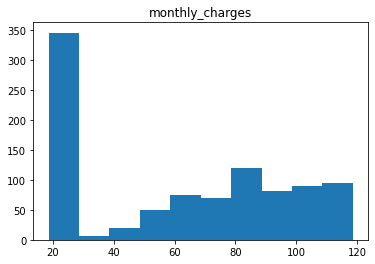

In [18]:
#plot original
plt.hist(train['monthly_charges'])
plt.title("monthly_charges")
plt.show()

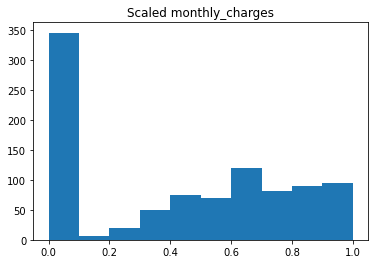

In [19]:
#plot scaled 
plt.hist(train['monthly_charges_minmax'])
plt.title("Scaled monthly_charges")
plt.show()

- **total_charges**

In [20]:
# create our scaler
# fit our scaler
# use our scaler

In [21]:
# create our scaler
scaler_tc = MinMaxScaler()

In [22]:
# fit our scaler
scaler_tc.fit(train[['total_charges']])

MinMaxScaler()

In [23]:
# use it
train['total_charges_minmax'] = scaler_tc.transform(train[['total_charges']])


In [24]:
# apply the saved scaler to our validate and test sets
validate['total_charges_minmax'] = scaler_tc.transform(validate[['total_charges']])
test['total_charges_minmax'] = scaler_tc.transform(test[['total_charges']])

In [25]:
train[['total_charges','total_charges_minmax']].head()

,total_charges,total_charges_minmax
5716,810.30,0.093459
225,4676.70,0.539406
2455,7581.50,0.874442
2421,7904.25,0.911668
2617,7346.20,0.847303


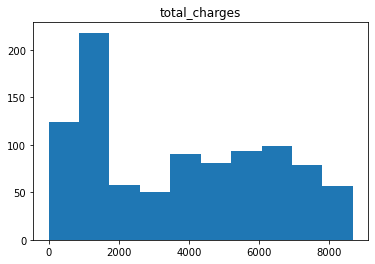

In [26]:
plt.hist(train['total_charges'])
plt.title("total_charges")
plt.show()

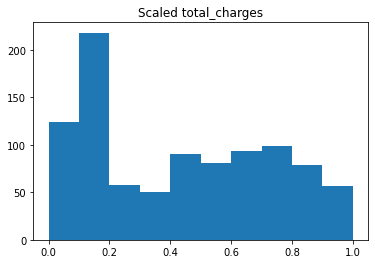

In [27]:
plt.hist(train['total_charges_minmax'])
plt.title("Scaled total_charges")
plt.show()

- **tenure**

In [28]:
# create our scaler
scaler_ten = MinMaxScaler()
# fit our scaler
scaler_ten.fit(train[['tenure']])
# use it
train['tenure_minmax'] = scaler_ten.transform(train[['tenure']])

In [29]:
# apply the saved scaler to our validate and test sets
validate['tenure_minmax'] = scaler_ten.transform(validate[['tenure']])
test['tenure_minmax'] = scaler_ten.transform(test[['tenure']])

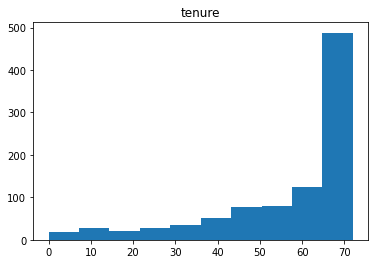

In [30]:
plt.hist(train['tenure'])
plt.title("tenure")
plt.show()

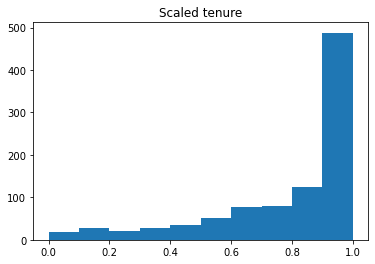

In [31]:
plt.hist(train['tenure_minmax'])
plt.title("Scaled tenure")
plt.show()

_____________________

## Create a function that plots and scales

In [ ]:

def scaled_mimmax (columns, train_df , validate_df, test_df):
    '''
    Take in a train_df and a list of columns that you want to scale (MinMaxScaler). 
    Fit a scaler only in train and transform in train, validate and test
    return plots of original and scaled columns and add new scaled columns train, validate and test
    
    '''
    for col in columns: 
        # create our scaler
        scaler = MinMaxScaler()
        # fit our scaler
        scaler.fit(train_df[[col]])
        # use it
        name = col + '_minmax'
        train_df[name] = scaler.transform(train_df[[col]])
        validate_df[name]= scaler.transform(validate_df[[col]])
        test_df[name]= scaler.transform(test_df[[col]])
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(train_df[name],  ec='black')
        plt.title('Scaled')
        plt.xlabel(name)
        plt.ylabel("counts")
        return train_df , validate_df, test_df
    

In [ ]:
train.head()

In [ ]:
columns = ['tenure','monthly_charges','total_charges']


In [ ]:
#this function is in prepare.py
p.plot_scaled_mimmax(columns, train)

In [ ]:
train.head()

In [ ]:
train.describe().T

In [ ]:
#this function is in prepare.py
p.scaled_mimmax(columns, train , validate , test)

In [ ]:
train.head()

In [ ]:
validate.head()

In [ ]:
test.head()

**2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?**

- **total_charges**

In [32]:
#use .inverse_transform
scaler_tc.inverse_transform(train[['total_charges_minmax']])

array([[ 810.3 ],
       [4676.7 ],
       [7581.5 ],
       [7904.25],
       [7346.2 ],
       [1067.65],
       [8477.6 ],
       [3254.35],
       [1753.  ],
       [1790.35],
       [1924.1 ],
       [3801.7 ],
       [4447.55],
       [ 599.25],
       [5957.9 ],
       [4193.4 ],
       [5981.65],
       [8310.55],
       [6094.25],
       [3221.25],
       [7840.6 ],
       [5265.1 ],
       [4566.5 ],
       [1201.65],
       [1372.45],
       [7250.15],
       [1036.  ],
       [1360.25],
       [7990.05],
       [2907.55],
       [7556.9 ],
       [4652.4 ],
       [3624.35],
       [ 210.65],
       [3533.6 ],
       [4534.45],
       [ 844.45],
       [7795.95],
       [5662.25],
       [3766.2 ],
       [8476.5 ],
       [1396.25],
       [6435.25],
       [7679.65],
       [1234.6 ],
       [1222.65],
       [1048.45],
       [5968.4 ],
       [5607.75],
       [4681.75],
       [4390.25],
       [5555.3 ],
       [1107.2 ],
       [1390.85],
       [7318.2 ],
       [71

In [33]:
# create a df so it can be ease to readn a use describe
tc_df= pd.DataFrame((scaler_tc.inverse_transform(train[['total_charges_minmax']])), columns = ['total_charges'])

In [35]:
#compare if I get the same values as the original
tc_df.describe()

,total_charges
count,949.000000
mean,3766.654584
std,2553.738773
min,0.000000
25%,1311.750000
50%,3772.500000
75%,6045.900000
max,8670.100000


In [36]:
train['total_charges'].describe()

count     949.000000
mean     3766.654584
std      2553.738773
min         0.000000
25%      1311.750000
50%      3772.500000
75%      6045.900000
max      8670.100000
Name: total_charges, dtype: float64

- **monthly_charges**

In [37]:
# create a df so it can be ease to readn a use describe
mc_df= pd.DataFrame((scaler_mc.inverse_transform(train[['monthly_charges_minmax']])), columns = ['monthly_charges'])

In [38]:
mc_df.describe()

,monthly_charges
count,949.000000
mean,61.483878
std,34.248775
min,18.550000
25%,24.300000
50%,65.550000
75%,90.450000
max,118.650000


In [39]:
train['monthly_charges'].describe()

count    949.000000
mean      61.483878
std       34.248775
min       18.550000
25%       24.300000
50%       65.550000
75%       90.450000
max      118.650000
Name: monthly_charges, dtype: float64

- **tenure**

In [40]:
# create a df so it can be ease to readn a use describe
ten_df= pd.DataFrame((scaler_ten.inverse_transform(train[['tenure_minmax']])), columns = ['tenure'])

In [41]:
ten_df.describe()

,tenure
count,949.000000
mean,57.216017
std,17.887739
min,0.000000
25%,49.000000
50%,65.000000
75%,71.000000
max,72.000000


In [42]:
train['tenure'].describe()

count    949.000000
mean      57.216017
std       17.887739
min        0.000000
25%       49.000000
50%       65.000000
75%       71.000000
max       72.000000
Name: tenure, dtype: float64

**3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.**

- **tenure**

In [43]:
QuantileTransformer(output_distribution='normal').fit_transform(train[['tenure']])

array([[-9.42392821e-01],
       [-1.24595385e-01],
       [ 5.19933758e+00],
       [ 7.06370428e-01],
       [ 5.19933758e+00],
       [-6.28714681e-01],
       [ 7.06370428e-01],
       [-8.94025931e-01],
       [ 7.06370428e-01],
       [ 1.59318785e-01],
       [-1.12758868e+00],
       [-1.00176792e+00],
       [ 7.27775672e-02],
       [-1.25670422e+00],
       [-1.39145821e-16],
       [ 7.27775672e-02],
       [ 5.19933758e+00],
       [ 7.06370428e-01],
       [ 5.19933758e+00],
       [-1.24595385e-01],
       [ 5.19933758e+00],
       [ 7.27775672e-02],
       [ 5.19933758e+00],
       [-1.78093191e-01],
       [ 7.06370428e-01],
       [ 4.96986867e-01],
       [-7.08068124e-01],
       [ 4.96986867e-01],
       [ 2.55258816e-01],
       [-2.75801643e-01],
       [ 5.19933758e+00],
       [-5.50059621e-01],
       [-3.55021026e-01],
       [-1.91175853e+00],
       [-8.38234999e-01],
       [-4.17708390e-01],
       [-9.21977936e-01],
       [ 4.96986867e-01],
       [ 7.0

In [44]:
tenure_QT = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(train[['tenure']]), columns= ['tenure_QT'])

In [45]:
tenure_QT.head()

,tenure_QT
0,-0.942393
1,-0.124595
2,5.199338
3,0.706370
4,5.199338


Text(0, 0.5, 'counts')

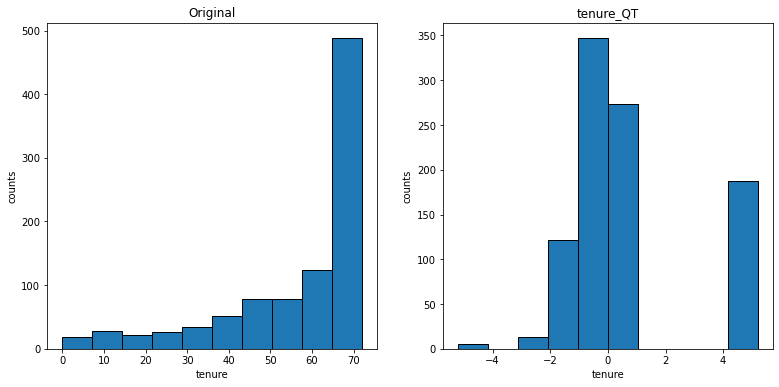

In [46]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['tenure'], ec='black')
plt.title('Original')
plt.xlabel('tenure')
plt.ylabel("counts")
plt.subplot(122)
plt.hist(tenure_QT['tenure_QT'],  ec='black')
plt.title('tenure_QT')
plt.xlabel('tenure')
plt.ylabel("counts")

In [53]:
def quant_trans (columns, df):
    for col in columns: 
        name = col + '_QT'
        qt_df = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(df[[col]]), columns= [name])
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(qt_df[name],  ec='black')
        plt.title('QuantileTransformer')
        plt.xlabel(name)
        plt.ylabel("counts")


In [54]:
train.head(1)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_minmax,total_charges_minmax,tenure_minmax
5716,3097-FQTVJ,20.0,41,810.3,0.014486,0.093459,0.569444


In [55]:
columns = ['monthly_charges','total_charges','tenure']

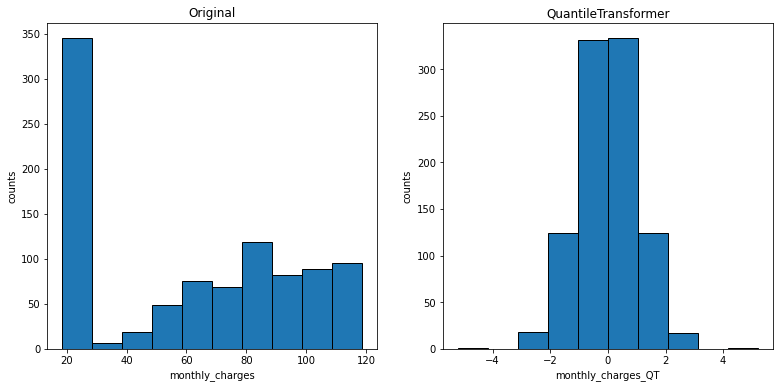

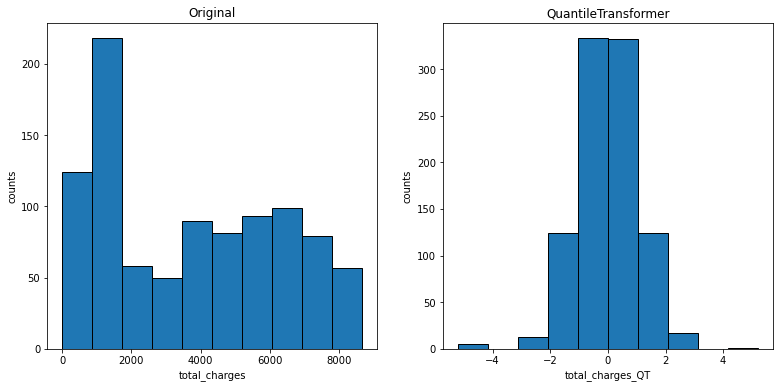

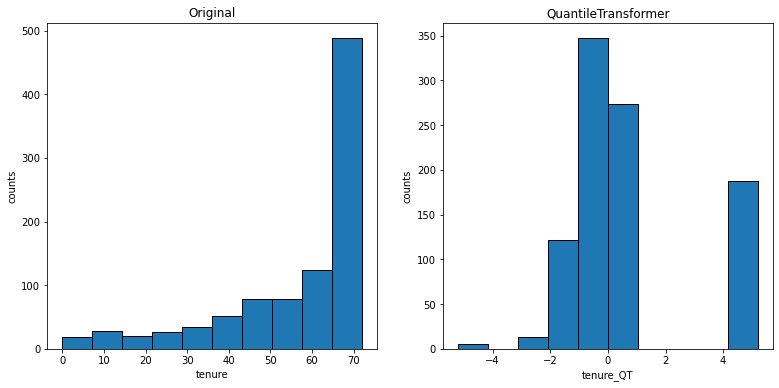

In [56]:
quant_trans (columns, train)

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [57]:
def quant_trans2 (columns, df):
    for col in columns: 
        name = col + '_QT'
        qt_df = pd.DataFrame(QuantileTransformer().fit_transform(df[[col]]), columns= [name])
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(qt_df[name],  ec='black')
        plt.title('QuantileTransforme')
        plt.xlabel(name)
        plt.ylabel("counts")
        


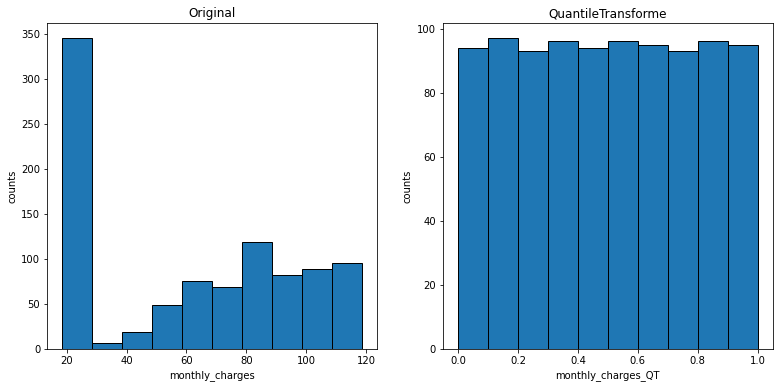

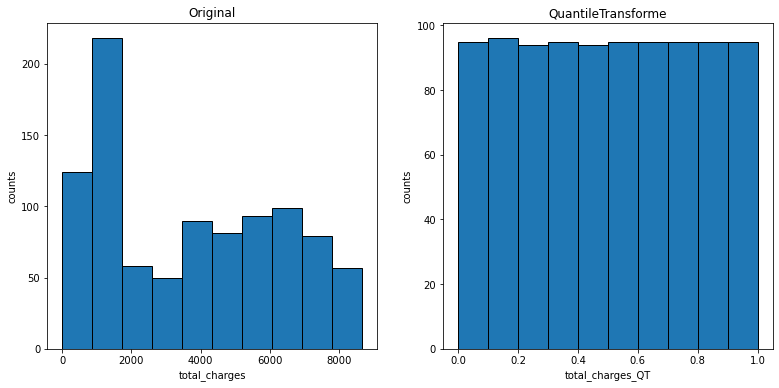

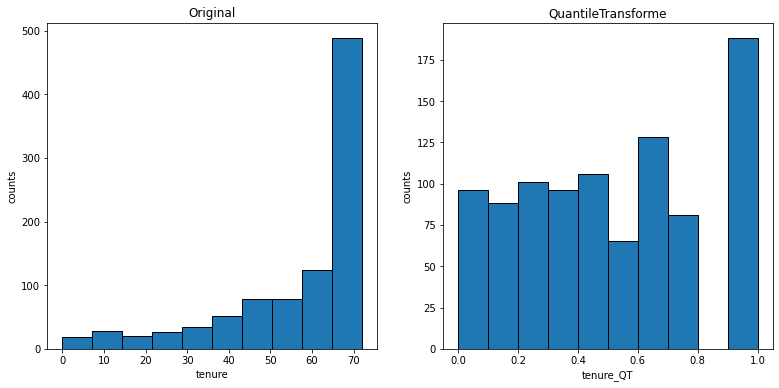

In [58]:
quant_trans2 (columns, train)

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def scaled_mimmax (columns, train_df , validate_df, test_df):
    '''
    Take in a train_df and a list of columns that you want to scale (MinMaxScaler). 
    Fit a scaler only in train and tramnsform in train, validate and test.
    add new scaled columns to train, validate and test
    Example
    p.scaled_mimmax(columns, train , validate , test)
    
    '''
    for col in columns: 
        # create our scaler
        scaler = MinMaxScaler()
        # fit our scaler
        scaler.fit(train_df[[col]])
        #create a name for the new colums
        name = col + '_minmax'
        # use it
        train_df[name] = scaler.transform(train_df[[col]])
        validate_df[name]= scaler.transform(validate_df[[col]])
        test_df[name]= scaler.transform(test_df[[col]])